# Transformada de Fourier

In [1]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
from scipy.integrate import odeint
import numpy as np
from numpy.fft import fft, fftfreq, ifft
import math
from ipykernel import kernelapp as app

### Codigo personal para la transformada de Fourier

Definimos la funcion que sera transformada (una gaussiana) y la evaluamos en el rango de -10 a 10. Usamos $\mu$ = 0 y $\sigma$ = 2.

In [2]:
def gaus (x, mu, sig):
    w = (1./(np.sqrt(2. * np.pi) * sig)) * np.exp((1./2) * (-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))
    return w

In [18]:
n = 1000
amp = np.empty(n, dtype=complex)
x = np.linspace(-100, 100, n)
mu, delta = 0, .5
y = gaus(x,mu,delta)

Graficamos la funcion gaussiana.

Text(0,0.5,'$y$')

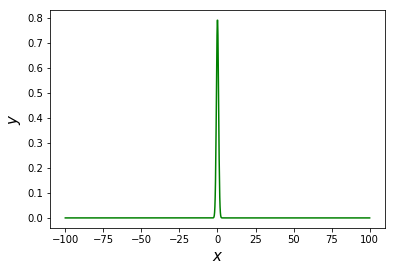

In [19]:
plt.plot(x,y, color = 'g')
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)

## Metodo 1 para la transformada de Fourier

Usamos la siguiente expresion para encontrar la tranformada y definimos una funcion que la evalue:

$X(K) = \sum_{n=0}^{N-1} (Xn) e^{\frac{-j2\pi Kn}{N}}$

Donde:

X(K): Valor de la transformada discreta de Fourier  
N: Numero de muestras  
K: Frecuencia  
n: numero de muestra(Se incrementa cada termino)

In [3]:
def amplitud (fun, n, i):
    u = 0
    for j in range(0, n):
        a = fun[j] * np.exp(-complex(0,1) * 2 * np.pi * i * j / (n))
        u = u + a
    return u

Evaluamos para cada punto en la distribucion

In [24]:
for i in range(0, n):
    amp[i] = amplitud(y, n, i)

Graficamos la transformada, es necesario hacer una transformacion para las frecuencias tambien.

Text(0,0.5,'$Amplitud$')

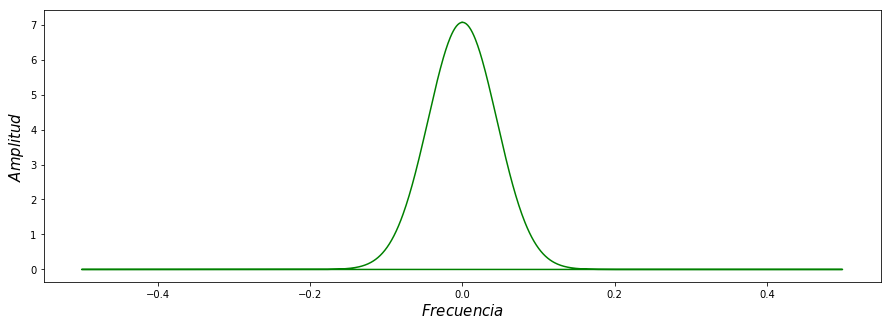

In [25]:
xf = np.fft.fftfreq(np.size(amp))
plt.figure(figsize=(15,5))
plt.plot(xf,abs(amp), '-', color = 'g')
plt.xlabel("$Frecuencia$",fontsize = 15)
plt.ylabel("$Amplitud$",fontsize = 15)


## Metodo 2 (alternativo) para la transformada de Fourier

In [38]:
# Con este codigo solo comprobe que la evaluacion del Metodo 1 sea correcta.
def dft(x):
    N, yr, yi = len(x), [], []
    for k in range(N):
        real, imag = 0, 0
        for n in range(N):
            theta = -k * (2 * math.pi) * (float(n) / N)
            real += x[n] * math.cos(theta)
            imag += x[n] * math.sin(theta)
        yr.append(real / N) # Regresa la parte real
        yi.append(imag / N) # Regresa la parte imaginaria
    return yr, yi

## Metodo 3 para la transformada de Fourier utilizando la funcion FFT

Usamos la funcion fft (Fast Fourier Transform) precargada para obtener la transformada de Fourier de nuestra funcion.

In [26]:
yfft = fft(y)

Graficamos la transformada, tambien es necesario hacer una transformacion para las frecuencias.

Text(0,0.5,'$Amplitud$')

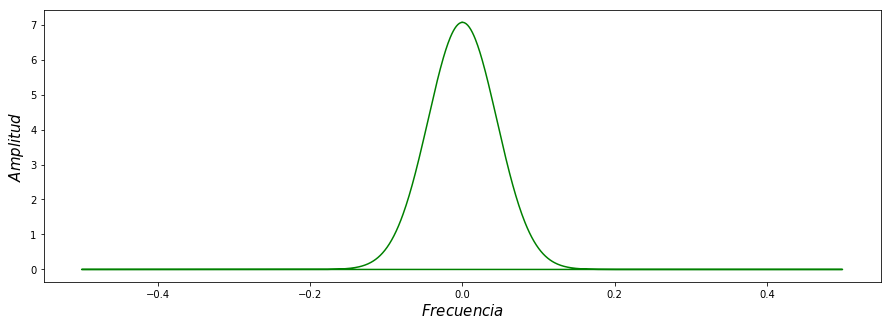

In [28]:
xf = np.fft.fftfreq(np.size(yfft))
plt.figure(figsize=(15,5))
plt.plot(xf,abs(yfft), '-', color = 'g')
plt.xlabel("$Frecuencia$",fontsize = 15)
plt.ylabel("$Amplitud$",fontsize = 15)

In [251]:
# Definimos la funcion inversa de la transformada de Fourier que nos puede servir mas adelante.

def idft(yr, yi):
    N, x = len(yr), []
    for n in range(N):
        real, imag = 0, 0
        for k in range(N):
            theta = k * (2 * math.pi) * (float(n) / N)
            real += (yr[k] * math.cos(theta)) - (yi[k] * math.sin(theta))
            # imag += (yr[k] * math.sin(theta)) + (yi[k] * math.cos(theta))
        x.append(real)
    return x

### Ahora, ¿que pasa si $x_{0}=1$ con la transformada? Comparemos el Metodo 1 con la funcion FFT.

Cambiamos los parametros y graficamos la gaussiana:

In [4]:
n2 = 1000
amp2 = np.empty(n2, dtype=complex)
x2 = np.linspace(-100, 100, n2)
mu2, delta2 = 1, 3
y2 = gaus(x2, mu2, delta2)

Text(0,0.5,'$y$')

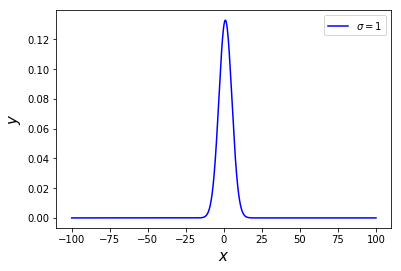

In [63]:
plt.plot(x2,y2, color = 'b', label='$\sigma = 1$')
plt.legend()
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)

Usamos el Metodo 1:

In [68]:
%%timeit
for i in range(0, n2):
    amp2[i] = amplitud(y2, n2, i)

6.99 s ± 467 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Usamos el metodo FFT:

In [67]:
%%timeit
yfft2 = fft(y2)

8.81 µs ± 895 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Graficamos ambas transformaciones

In [ ]:
xf2 = np.fft.fftfreq(np.size(amp2))
xf22 = np.fft.fftfreq(np.size(yfft2))
plt.plot(xf22,abs(yfft2), '-', color = 'r')
plt.plot(xf2,abs(amp2), '-', color = 'b', label='$\sigma = 1$')
plt.legend()
plt.xlabel("$Frecuencia$",fontsize = 15)
plt.ylabel("$Amplitud$",fontsize = 15)
plt.figure(figsize=(15,5))

Las graficas se empalman pero la funcion FFT requiere menos tiempo para su uso.

### Probemos con varios valores de s

### $X_{0} = 20$

In [71]:
amp3 = np.empty(n2, dtype=complex)
x3 = np.linspace(-100, 100, n2)
mu3, delta3 = 20, 3
y3 = gaus(x3, mu3, delta3)

Text(0,0.5,'$y$')

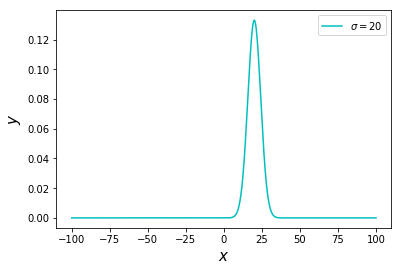

In [72]:
plt.plot(x3,y3, color = 'c', label='$\sigma = 20$')
plt.legend()
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)

In [73]:
%%timeit
for i in range(0, n2):
    amp3[i] = amplitud(y3, n2, i)

In [75]:
%%timeit
yfft3 = fft(y3)

<Figure size 1080x360 with 0 Axes>

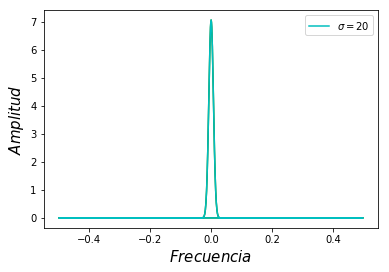

<Figure size 1080x360 with 0 Axes>

In [77]:
xf3 = np.fft.fftfreq(np.size(amp3))
xf33 = np.fft.fftfreq(np.size(yfft3))
plt.plot(xf33,abs(yfft3), '-', color = 'g')
plt.plot(xf3,abs(amp3), '-', color = 'c', label='$\sigma = 20$')
plt.legend()
plt.xlabel("$Frecuencia$",fontsize = 15)
plt.ylabel("$Amplitud$",fontsize = 15)
plt.figure(figsize=(15,5))

### $X_{0} = 80$

In [5]:
amp4 = np.empty(n2, dtype=complex)
x4 = np.linspace(-100, 100, n2)
mu4, delta4 = 80, 3
y4 = gaus(x4, mu4, delta4)

Text(0,0.5,'$y$')

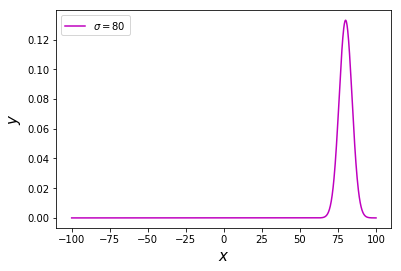

In [6]:
plt.plot(x4,y4, color = 'm', label='$\sigma = 80$')
plt.legend()
plt.xlabel("$x$",fontsize = 15)
plt.ylabel("$y$",fontsize = 15)

In [7]:
for i in range(0, n2):
    amp4[i] = amplitud(y4, n2, i)

In [8]:
%%timeit
yfft4 = fft(y4)

7 µs ± 185 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
xf4 = np.fft.fftfreq(np.size(amp4))
xf44 = np.fft.fftfreq(np.size(yfft4))
plt.plot(xf44,abs(yfft4), '-', color = 'g')
plt.plot(xf4,abs(amp4), '-', color = 'c', label='$\sigma = 80$')
plt.legend()
plt.xlabel("$Frecuencia$",fontsize = 15)
plt.ylabel("$Amplitud$",fontsize = 15)
plt.figure(figsize=(15,5))

NameError: name 'yfft4' is not defined